![SPOTIFY](image.png) 

# Predicting Hits on Spotify using Machine Learning

#### Authors: Adithya Bhonsley, Prayaag Gupta, Benjamin Wang, Dinesh Polisetty 

In this era of digital music, understanding the dynamics of song popularity is more intriguing than ever! With millions of songs available at our fingertips, we were curious to leverage machine learning to launch a data-driven exploration into what makes songs hits. For our experiments, we'll take a closer look into Spotify, one of the largest music streaming platforms in the world, and aim to predict song popularity through a variety of different modeling and analysis techniques covered in class. Below is the methodology we follow throughout this notebook for our experiments:

* **Fetch**: Collect input data from various sources and synthesize
* **Modify**: Run data pre-processing, cleaning, and feature selection/engineering
* **Analyze**: Examine data using varying models, optimize through hyperparamater tuning, and compare
* **Discuss**: Present results and visualizations to draw meaningful insights

## Defining a Library

First, lets import all relevant libraries needed for data analysis, modeling, and visualizations.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Fetching Data

For our experiments, we'll use a Kaggle dataset sourced by developer Nidula Elgiryewithana, a comprehensive list of 2023 songs with an extensive insights on musical attributes, popularity, relevant metrics, and more. First, we read and load the data from its original CSV format.

In [3]:
data = pd.read_csv('data/spotify-2023.csv', encoding='latin-1')
data.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


<hr style="border:0.25px solid gray">

## Data Exploration

Given the data, now let's take a closer look the features provided, their data-types, and other attributes which may need to adjusted or cleaned prior to experimentation.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Above we see various attributes regarding a song's factual attributes (name, artist, release time, charts ranking, etc) as well as some more subjective attributes like musical ratings (danceability, energy, etc). Here's a more in-depth breakdown on the meaning behind these subjective musical features, scored between 0 and 100:

* **danceability_%**: Measure of how suitiable a song is for dancing.
* **valence_%**: Measure of how upbeat a song is (low for sad/negative, high for positive/upbeat)	
* **energy_%**: Measure of how energetic a song is.
* **acousticness_%**: Measure of acoustic sound in the song	
* **instrumentalness_%**: Measure of instrumental content in the song	
* **liveness_%**: Measure of live performance elements in the song
* **speechiness_%**: Measure of spoken words in the song.

## Data Cleaning

#### Handling Missing Values
Let's inspect the dataset for any missing values which could potentially skew results ...

In [5]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

From the table above, we find 50 occurrences of missing <code>in_shazam_charts</code> values and 95 occurences of missing <code>key</code> values:

* The missing Shazam charts records are likely popular songs that did not chart on Shazam. We can mark these values with a placeholder of -1 since it's are outside the range of possible values (positive integers).
* The entries with missing key values, denoting the song's key, could likely not be established. These key values are assigned using pitch class labels (0-12), more info: <href>https://en.wikipedia.org/wiki/Pitch_class</href>. To address these missing values, we can fill with -1 as well since that is also outside the range of possible values.

In both cases, we resolve missing values using a placeholder value, clearly indicating to our future model that the data is missing or not applicable.

In [6]:
# Fill missing values with -1 in shazam charts column
data['in_shazam_charts'] = data['in_shazam_charts'].fillna(-1)

# Fill missing values with -1 in key column
data['key'] = data['key'].fillna(-1)

# Check for missing again
data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

#### Handling Improper Types
Now let's check to see if any of our attributes are incorrectly typed in the data and require modifcation.

In [7]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

* Above, we see that <code>streams</code> is an object type, but instead should be numeric to represent a quantity. Additionally, the same applies with columns <code>in_deezer_playlists</code> and <code>in_shazam_charts</code>.
* The <code>key</code> and <code>mode</code> columns are categorical, denoting a 0-12 pitch label or Major/Minor label, respectively. We can convert these to integer representations.

In [8]:
# Convert streams to numeric values
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Convert deezer playlist rankings to numeric values
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')

# Convert shazam chart rankings to numeric values
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')

# Assign integer representations for each pitch class
pitch_class_label = {'C': 0,
               'C#': 1,
               'D': 2,
               'D#': 3,
               'E': 4,
               'F': 5,
               'F#': 6,
               'G': 7,
               'G#': 8,
               'A': 9,
               'A#': 10,
               'B': 11
               }

# Assign integer representations for each mode class
mode_class_label = {"Major": 0, "Minor": 1}

# Convert key str values (A, B, C#, etc) -> (0, 1, ... 12)
data['key'] = data['key'].map(pitch_class_label).fillna(-1)

# Convert mode str labels to integer
data['mode'] = data['mode'].map(mode_class_label).fillna(-1)

In [9]:
#### Crafting New Features

#### Descriptive Statistics

In [10]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,874.000000,...,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,109.740275,...,122.540399,5.197272,0.422875,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,178.811406,...,28.057802,3.701424,0.494275,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,65.000000,-1.000000,0.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,12.000000,...,100.000000,2.000000,0.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,36.500000,...,121.000000,5.000000,0.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,110.000000,...,140.000000,8.000000,1.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,...,206.000000,11.000000,1.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [11]:
# Notes about descriptive stats

#### Data Visualizations

Now, let's visualize these individual attributes to determine potentially important trends, outliers, and characteristics. First, let's take a look at the **top 20** songs on Spotify in 2023:

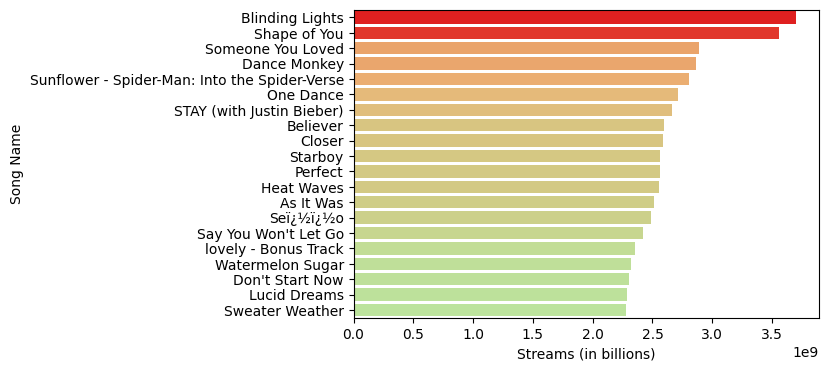

In [27]:
# Sort and fetch top 10 songs
data_sorted = data.sort_values(by='streams', ascending=False)
top_20 = data_sorted.head(20)

norm = plt.Normalize(data['streams'].min(), data['streams'].max())
colors = plt.cm.rainbow(norm(top_20['streams'])) 

# Display results in bar chart
plt.subplots(1,1, figsize=(6,4))
sns.barplot(data=top_20, x='streams', y='track_name', palette=list(colors), hue='track_name')
plt.xlabel('Streams (in billions)')
plt.ylabel('Song Name')

plt.show()

Now, let's inspect (a) distribution of attribute values and (b) the relationships between all the attributes in our dataset to our prediction variable (# of streams) through several visualizations:

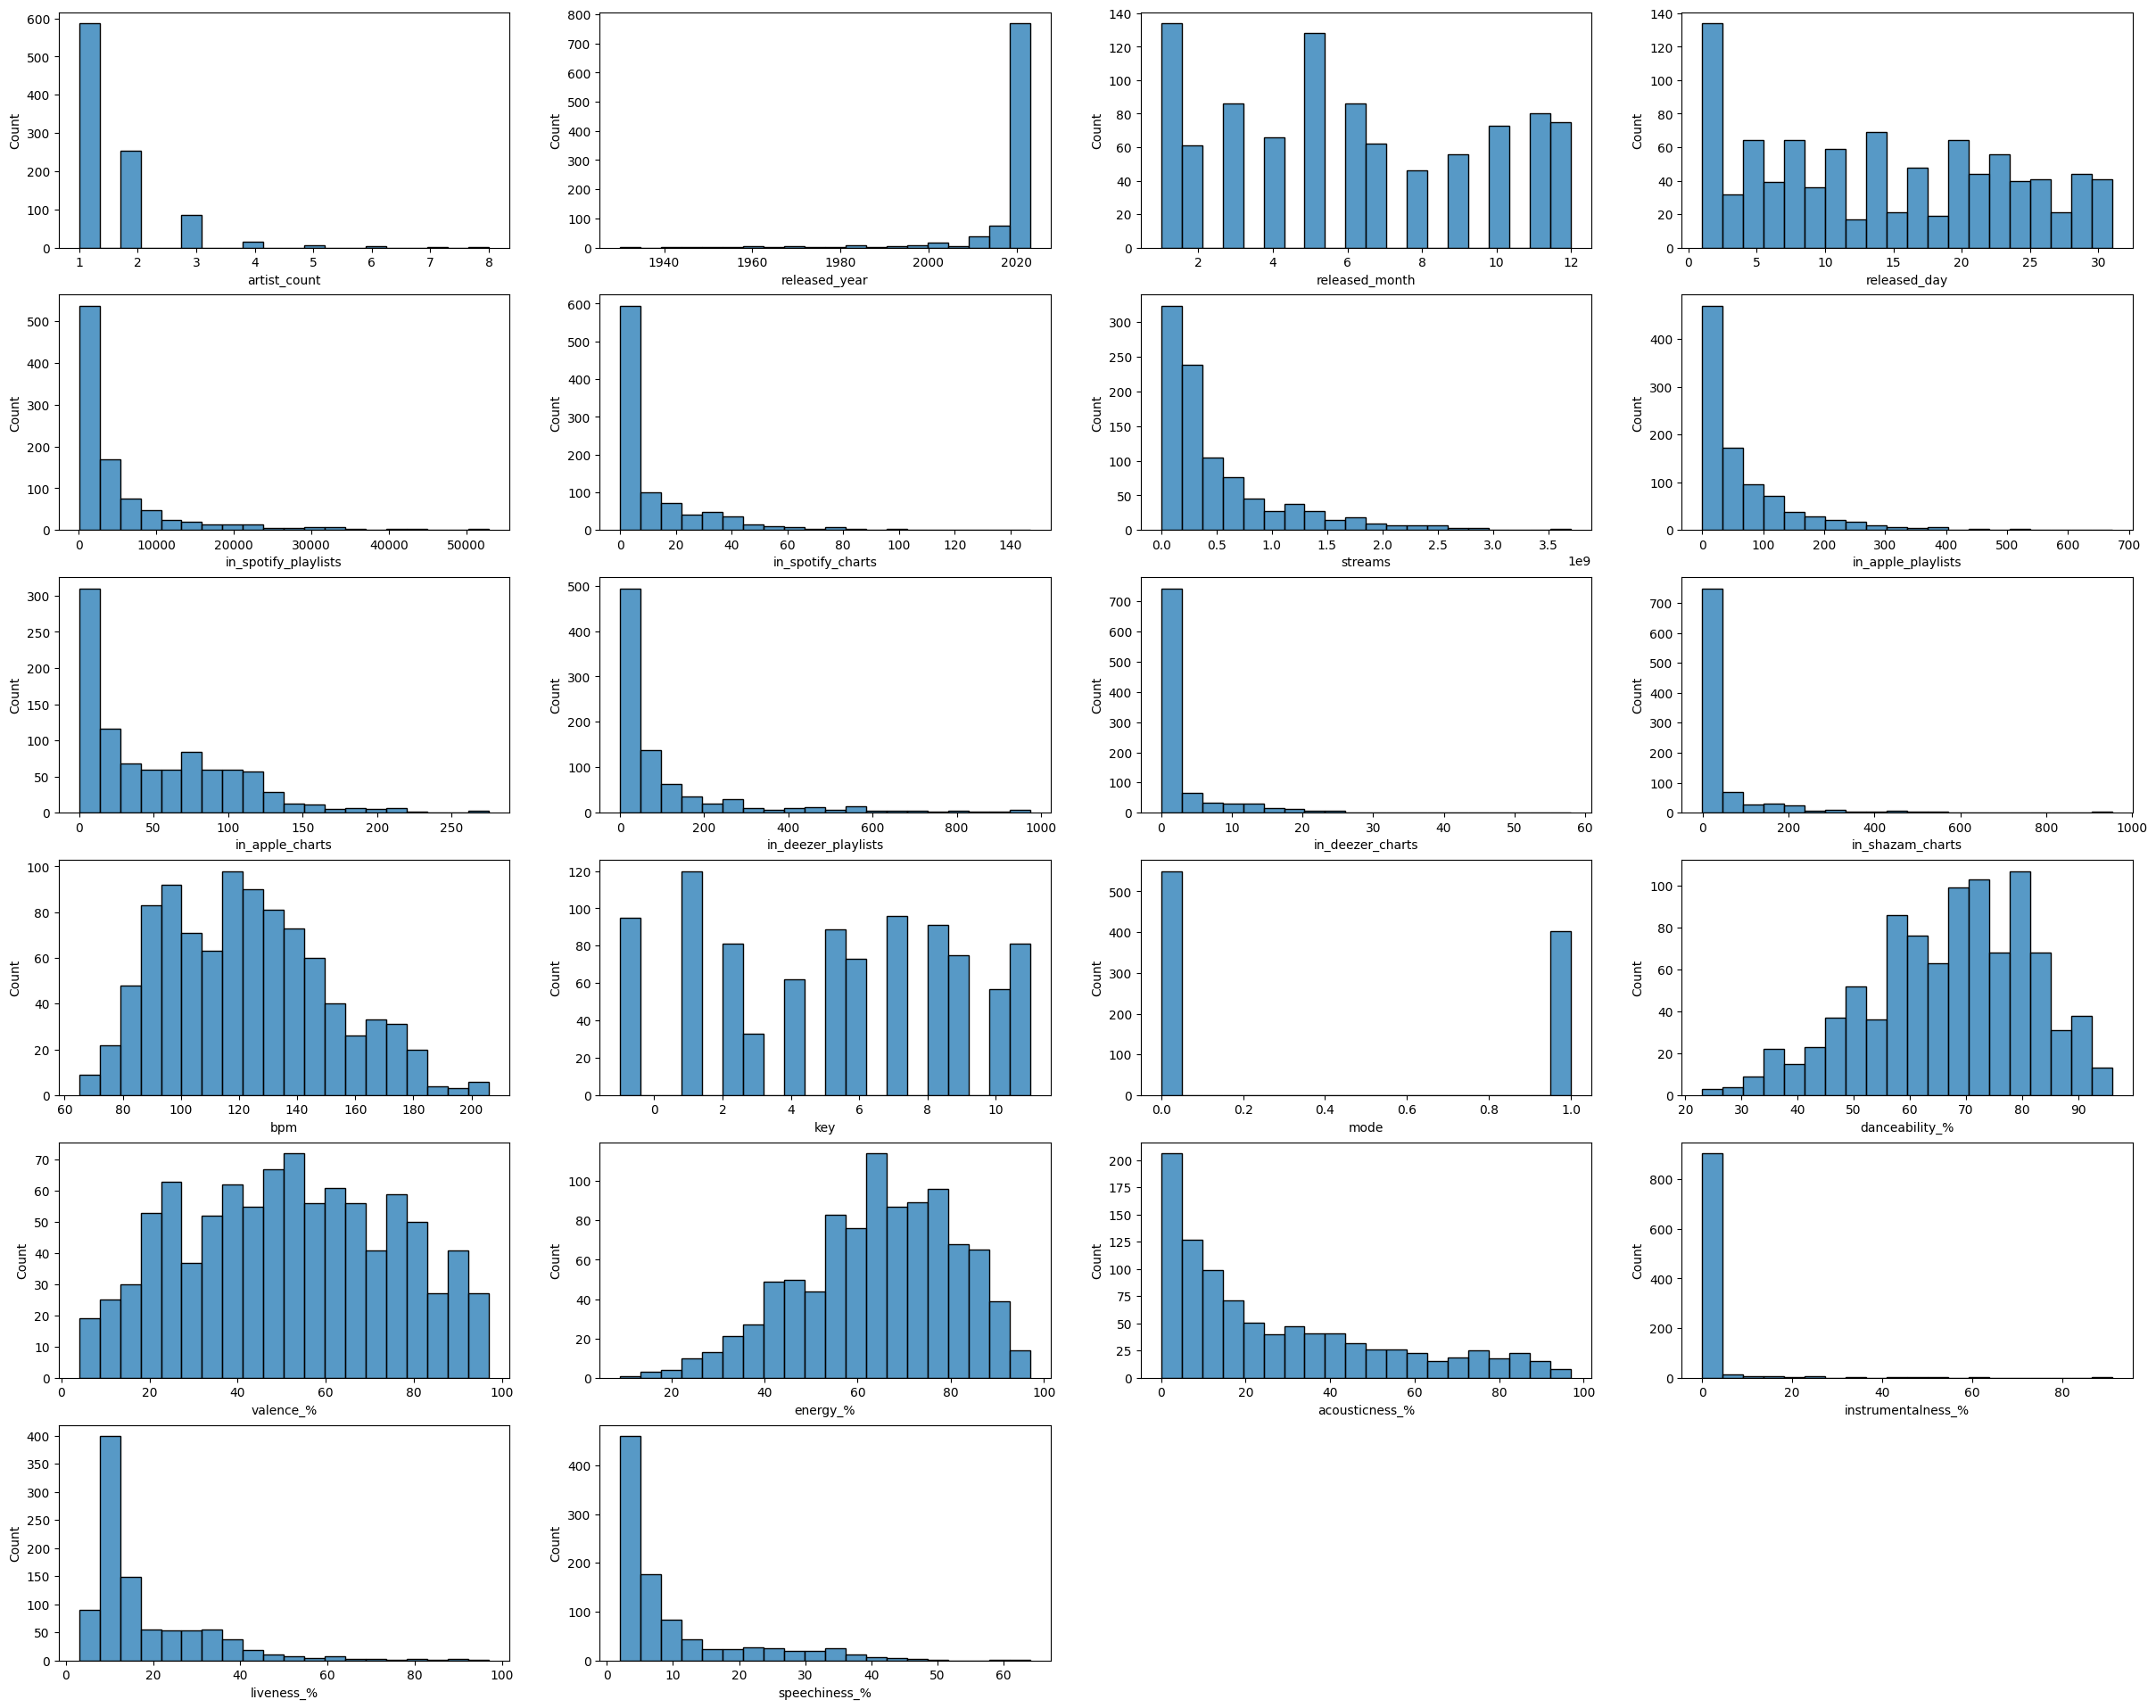

In [59]:
plt.figure(figsize=(30,24))

for i, col in enumerate(data.columns):
    if col != "track_name" and col != "artist(s)_name":
        plt.subplot(6, 4, i - 1)
        sns.histplot(data=data, x=col, bins=20)
        plt.tight_layout
    
plt.show()

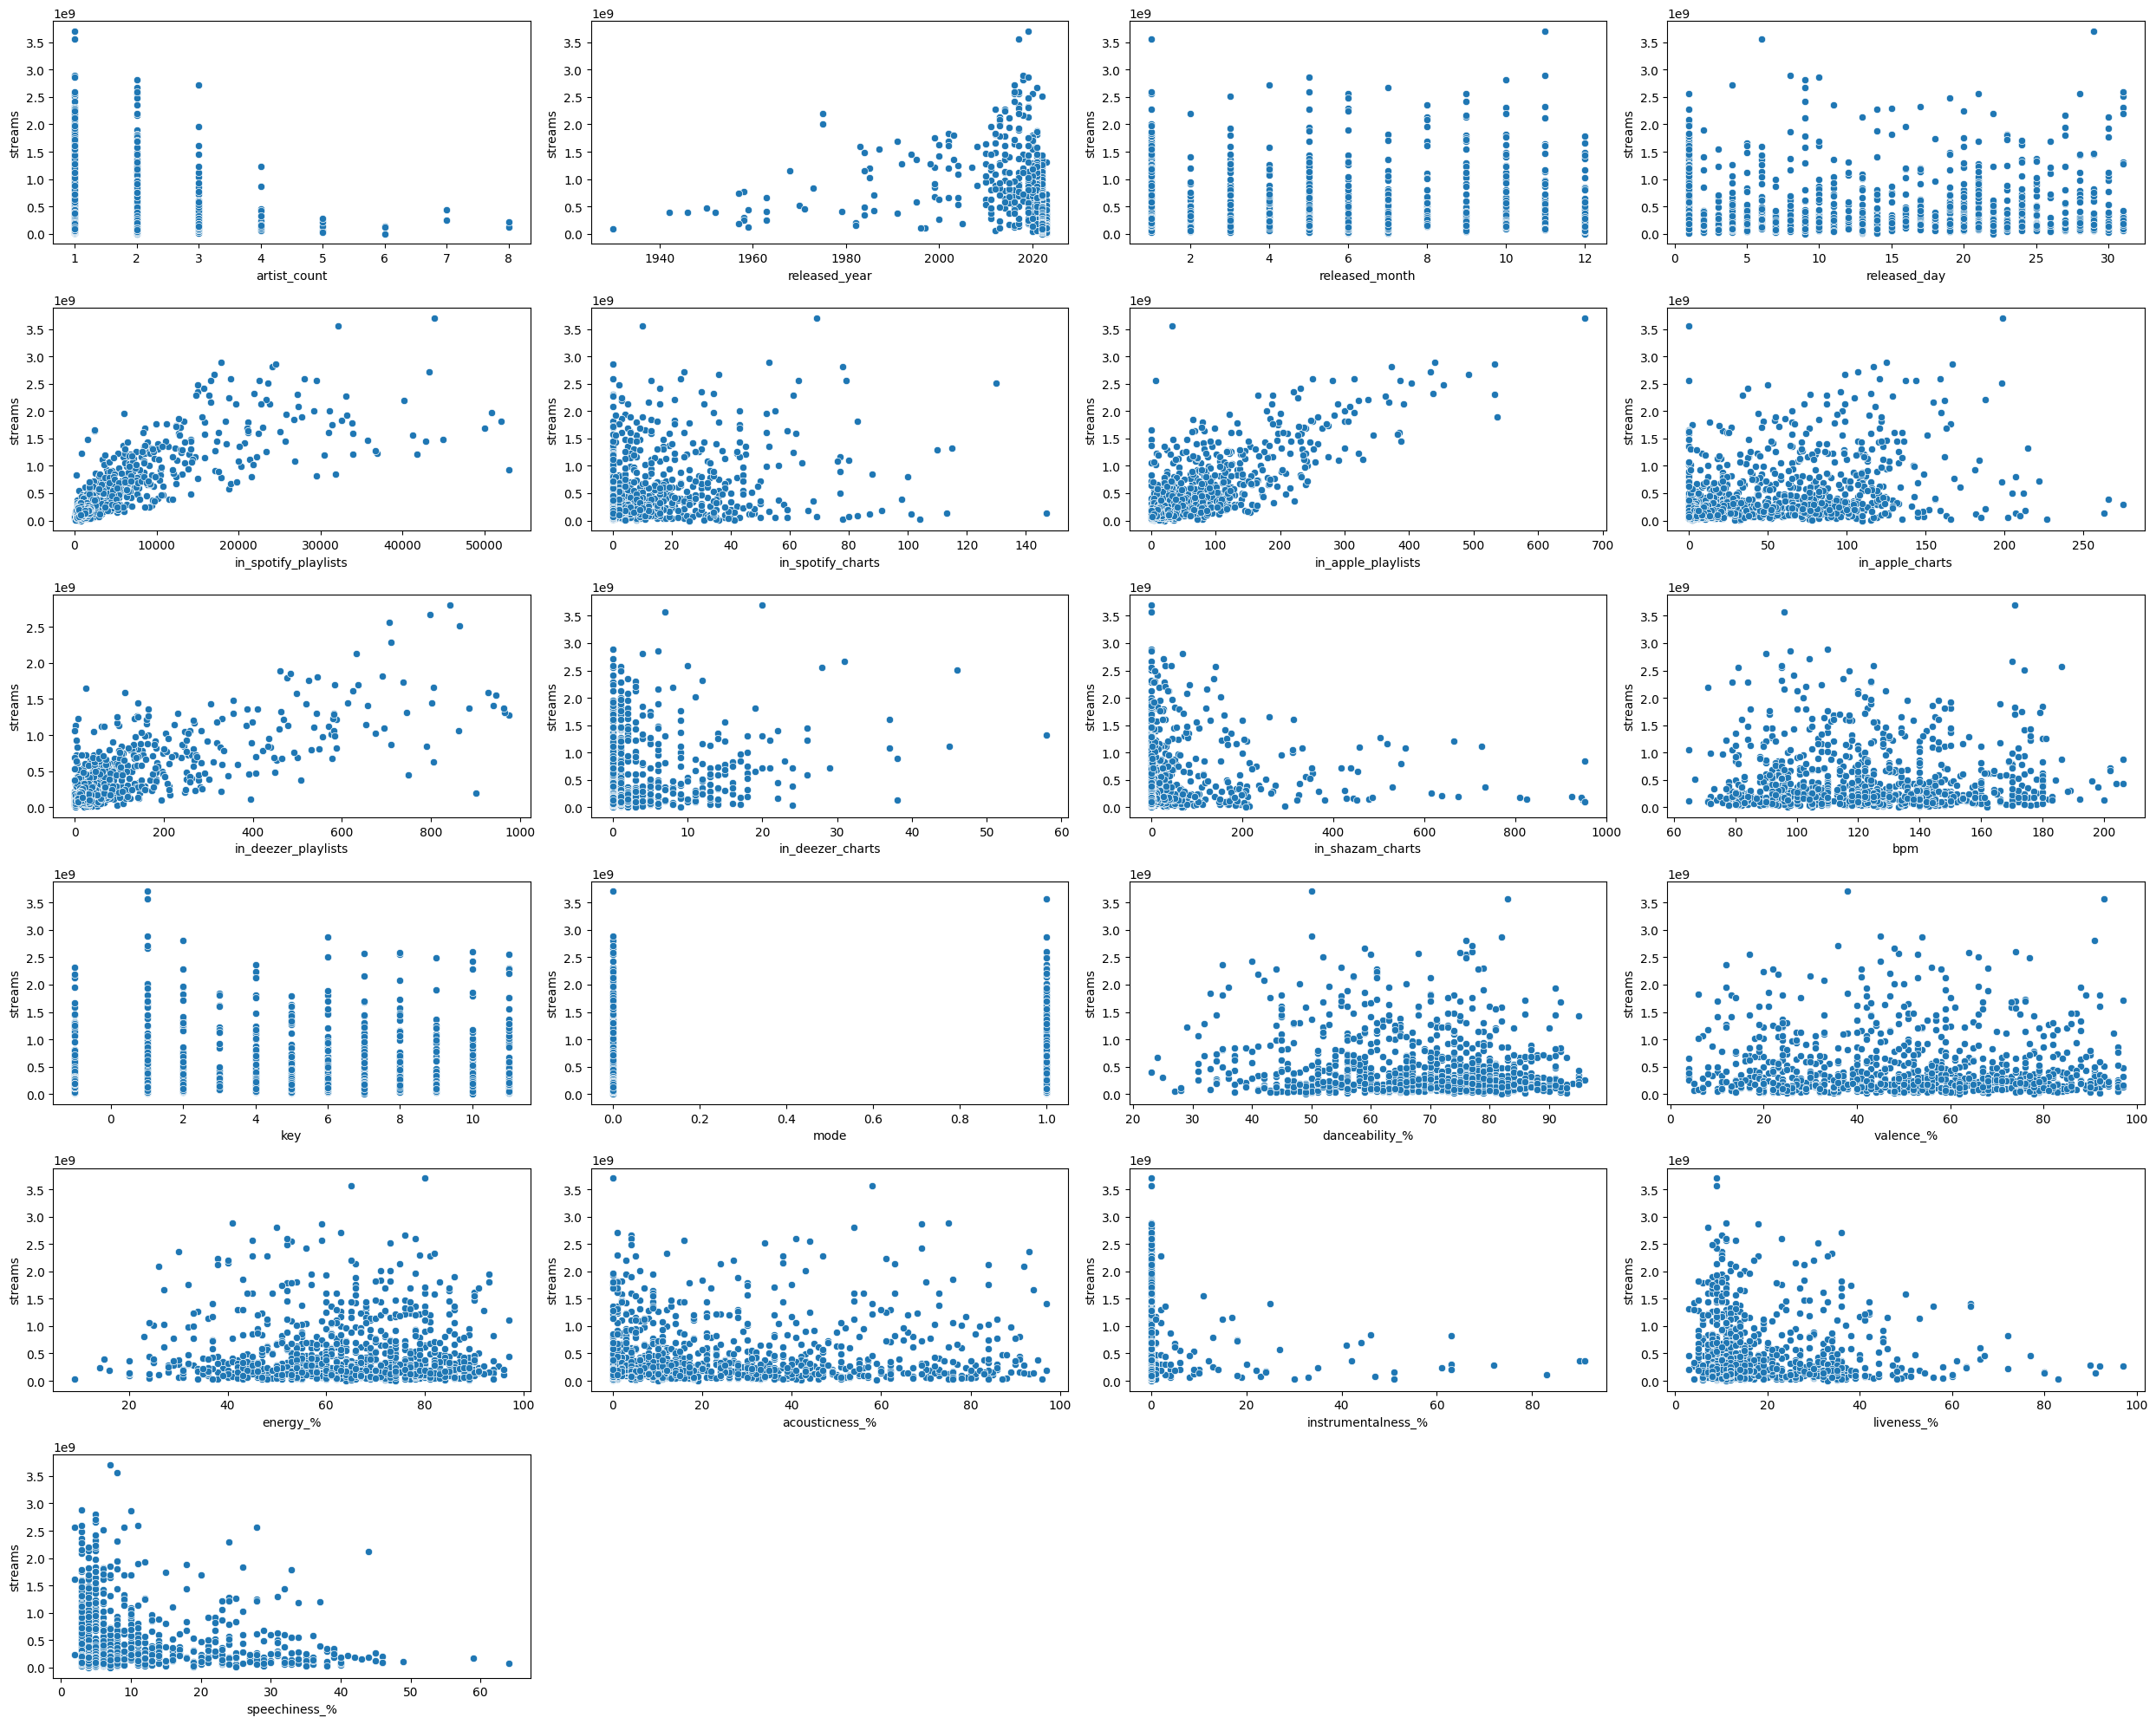

In [55]:
plt.figure(figsize=(25,20))

exclude_cols = ["track_name", "artist(s)_name", "streams"]

idx = 1
for i, col in enumerate(data.columns):
    if col not in exclude_cols:
        plt.subplot(6,4, idx)
        idx += 1
        sns.scatterplot(data=data, x=col, y='streams')
    
plt.tight_layout()
plt.show()

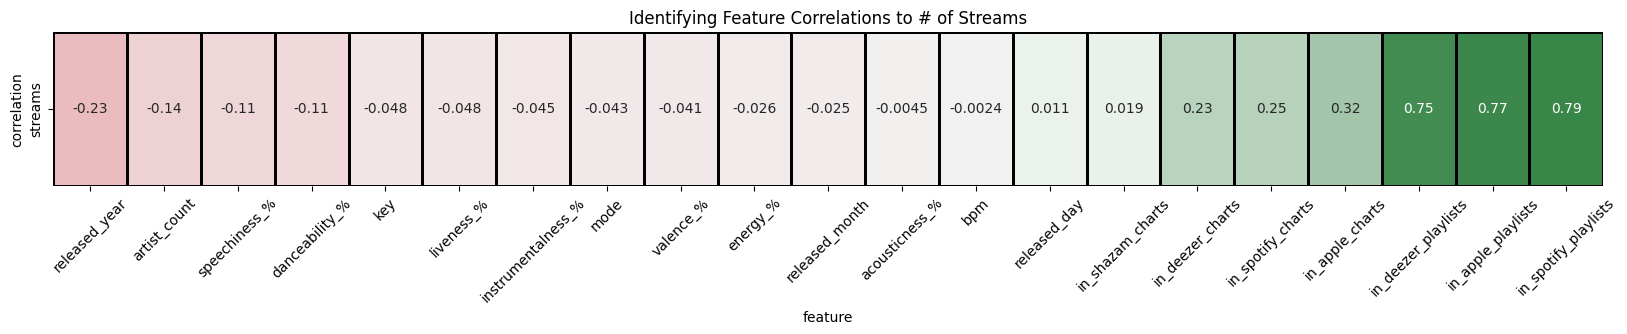

In [63]:
numeric_data = data.select_dtypes(include='number')
correlation_with_streams = numeric_data.corr()['streams'].drop('streams').sort_values(ascending=True)

heatmap_data = pd.DataFrame(correlation_with_streams).T

cmap = sns.diverging_palette(10, 133, as_cmap=True)

plt.figure(figsize=(20, 2))
sns.heatmap(heatmap_data, annot=True, cmap=cmap, center=0,
            cbar=False, linewidths=1, linecolor='black')

plt.xticks(rotation=45)
plt.xlabel('feature')
plt.ylabel('correlation')
plt.title('Identifying Feature Correlations to # of Streams')
plt.show()

<hr style="border:0.25px solid gray">

## Predictive Modeling

In [66]:
# Simple Regression

In [67]:
# Polynomial Regression ?

In [68]:
# Regression Trees

In [69]:
# KNN Regression + hyperparamater tuning

In [70]:
# SVR

In [71]:
# Evaluate + Ensemble

<hr style="border:0.25px solid gray">


## Results & Discussion

In [ ]:
# talk about model results, possible ways to improve, limitati